In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import os
import pandas as pd

directory = os.getcwd()
for root,dirs,files in os.walk(directory):
    for file in files:
       if file.endswith(".csv"):
           vars()[file[:-4]]=pd.read_csv(file).dropna(axis=[0,1],how='all')
           print(file[:-4],'read')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  


education_info1 read


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


education read
education_info2 read
member_list_1 read
member_list_2 read
experience1 read
experience2 read
company_list_2 read
company_list_1 read


In [235]:
members=pd.concat([member_list_1,member_list_2],sort=False,ignore_index=True)

In [270]:
company=pd.concat([company_list_1,company_list_2],sort=False,ignore_index=True)
company.head()

,完成打勾,PUID,公司名稱,網站,白皮書,備註,檢查,備註檢查結果
0,v,1.0,FunFair,https://funfair.io/,https://funfair.io/how-it-works/our-team/,NaN,NaN,NaN
1,v,2.0,EOS,https://eos.io/,http://github.com/EOSIO/Documentation/blob/mas...,NaN,NaN,NaN
2,v,3.0,Storj,https://storj.io/tokensale,https://storj.io/storj.pdf,NaN,NaN,NaN
3,v,4.0,Crypto.com,https://mco.crypto.com/,https://crypto.com/mco_whitepaper,NaN,NaN,NaN
4,v,5.0,Polybius,https://polybius.io/,http://polybius.io/media/prospectus.pdf,NaN,NaN,NaN


In [271]:
company=company.iloc[:,1:3]

In [272]:
company.head()

,PUID,公司名稱
0,1.0,FunFair
1,2.0,EOS
2,3.0,Storj
3,4.0,Crypto.com
4,5.0,Polybius


## import experience data 
 1. import and drop the last 3 cols
 2. parser datetime into time

In [25]:
experience=pd.concat([experience1,experience2],sort=False,ignore_index=True)

In [26]:
experience.head()

,PUID,MUID,過去任職公司名稱,職稱,職稱Tiers,起始年月,終止年月,duration,Unnamed: 11,Unnamed: 8
0,1.0,1.0,Ninja Theory Ltd,non-exec director,2.0,Oct 2004,Present,14.26,Present,NaN
1,1.0,1.0,Codeplay Ltd,non-exec director,2.0,Jan 2001,Present,18.01,1/1/19,NaN
2,1.0,1.0,PKR.com,Founder,1.0,Oct-18,Sep-14,-34,NaN,NaN
3,1.0,1.0,Argonaut Games Plc,CEO,1.0,1982,2004,22,NaN,NaN
4,1.0,1.0,ARC International,co-founder & ex non-exec,1.0,Sep 2000,Sep 2001,1,NaN,NaN


In [27]:
experience=experience.iloc[:,:-3]
experience.columns=['PUID','MUID','PAST_COM','TITLE','TIERS','START','END']

In [29]:
experience.head(20)

,PUID,MUID,PAST_COM,TITLE,TIERS,START,END
0,1.0,1.0,Ninja Theory Ltd,non-exec director,2.0,Oct 2004,Present
1,1.0,1.0,Codeplay Ltd,non-exec director,2.0,Jan 2001,Present
2,1.0,1.0,PKR.com,Founder,1.0,Oct-18,Sep-14
3,1.0,1.0,Argonaut Games Plc,CEO,1.0,1982,2004
4,1.0,1.0,ARC International,co-founder & ex non-exec,1.0,Sep 2000,Sep 2001
5,1.0,2.0,Probable Cause Ltd,Chief Technology Officer,1.0,Dec 2015,Jan 2018
6,1.0,2.0,PKR.com,"Co-Founder, Chief Technology Officer",1.0,Mar 2005,Nov 2015
7,1.0,2.0,Kuju Entertainment,Executive Producer,3.0,Oct 2003,Mar 2005
8,1.0,2.0,Lost Toys Ltd,Managing Director,2.0,Mar 1999,Sep 2003
9,1.0,2.0,Bullfrog Productions Ltd,Lead Programmer,3.0,1991,1993


- calculate numbers of working experience 
- calculate the average years of working experience for each company

In [31]:
a=experience.groupby(['PUID','MUID']).MUID.value_counts()#.nunique()
a[1]

MUID  MUID
1.0   1.0     5
2.0   2.0     5
3.0   3.0     2
4.0   4.0     7
Name: MUID, dtype: int64

In [32]:
average_experience=dict()
for i in range(1,343):
    average_experience[i]=a[i].mean()

In [37]:
average_experience

{1: 4.75,
 2: 4.333333333333333,
 3: 7.25,
 4: 5.25,
 5: 3.3333333333333335,
 6: 7.5,
 7: 2.0,
 8: 3.5,
 9: 1.0,
 10: 8.5,
 11: 4.0,
 12: 2.5,
 13: 3.5,
 14: 3.0,
 15: 1.6666666666666667,
 16: 11.0,
 17: 7.5,
 18: 3.0,
 19: 4.5,
 20: 12.0,
 21: 3.0,
 22: 3.0,
 23: 5.4,
 24: 3.3333333333333335,
 25: 4.6,
 26: 8.0,
 27: 6.0,
 28: 4.666666666666667,
 29: 5.0,
 30: 4.0,
 31: 3.6666666666666665,
 32: 8.25,
 33: 1.0,
 34: 5.666666666666667,
 35: 6.0,
 36: 4.857142857142857,
 37: 1.5,
 38: 5.5,
 39: 7.0,
 40: 1.0,
 41: 11.0,
 42: 4.666666666666667,
 43: 3.5,
 44: 4.333333333333333,
 45: 5.666666666666667,
 46: 8.333333333333334,
 47: 4.75,
 48: 6.166666666666667,
 49: 5.0,
 50: 5.666666666666667,
 51: 4.0,
 52: 6.5,
 53: 4.5,
 54: 5.0,
 55: 2.0,
 56: 5.333333333333333,
 57: 2.0,
 58: 3.6666666666666665,
 59: 6.0,
 60: 5.666666666666667,
 61: 7.0,
 62: 5.0,
 63: 3.0,
 64: 9.0,
 65: 3.0,
 66: 7.0,
 67: 6.0,
 68: 4.0,
 69: 5.0,
 70: 4.25,
 71: 5.0,
 72: 26.0,
 73: 6.0,
 74: 7.0,
 75: 8.0,
 76: 2

In [39]:
def time_transfer(string):
    import re
    import datetime
    try:
        if bool(string.upper()=='PRESENT'):
            time=datetime.datetime.today()
        if bool(re.match(r'^[a-zA-Z]{3} [0-9]+$',string)):
            time=datetime.datetime.strptime(string, '%b %Y')
        if bool(re.match(r'^[a-zA-Z]{3}-[0-9]+$',string)):
            time=datetime.datetime.strptime(string, '%b-%y')    
        if bool(re.match(r'^[0-9]{4}$',string)):
            time=datetime.datetime.strptime(string+'Jan', '%Y%b')
        if bool(re.match(r'^[0-9]+/[0-9]+$',string)):
            time=datetime.datetime.strptime(string,'%Y/%m')
        return time.year
    except:
        return None

In [40]:
def df_time_transfer(df,newcol,refercol):
    for idx in df.index:
        try:
            df.loc[idx,newcol]=time_transfer(df.loc[idx,refercol])
        except:
            pass
    return df


In [41]:
df_time_transfer(experience,'Start_time','START')
df_time_transfer(experience,'End_time','END')

,PUID,MUID,PAST_COM,TITLE,TIERS,START,END,Start_time,End_time
0,1.0,1.0,Ninja Theory Ltd,non-exec director,2.0,Oct 2004,Present,2004.0,2019.0
1,1.0,1.0,Codeplay Ltd,non-exec director,2.0,Jan 2001,Present,2001.0,2019.0
2,1.0,1.0,PKR.com,Founder,1.0,Oct-18,Sep-14,2018.0,2014.0
3,1.0,1.0,Argonaut Games Plc,CEO,1.0,1982,2004,1982.0,2004.0
4,1.0,1.0,ARC International,co-founder & ex non-exec,1.0,Sep 2000,Sep 2001,2000.0,2001.0
5,1.0,2.0,Probable Cause Ltd,Chief Technology Officer,1.0,Dec 2015,Jan 2018,2015.0,2018.0
6,1.0,2.0,PKR.com,"Co-Founder, Chief Technology Officer",1.0,Mar 2005,Nov 2015,2005.0,2015.0
7,1.0,2.0,Kuju Entertainment,Executive Producer,3.0,Oct 2003,Mar 2005,2003.0,2005.0
8,1.0,2.0,Lost Toys Ltd,Managing Director,2.0,Mar 1999,Sep 2003,1999.0,2003.0
9,1.0,2.0,Bullfrog Productions Ltd,Lead Programmer,3.0,1991,1993,1991.0,1993.0


In [42]:
b=experience.groupby(['PUID','MUID']).Start_time.min()    #find the earlies time that one person started to work

In [43]:
c=experience.groupby(['PUID','MUID']).End_time.max()      #find the lattest time that one person end working

In [44]:
a_=experience.groupby(['PUID','MUID']).nunique()
d=pd.merge(b,c,on=['PUID','MUID'])
d=pd.merge(a_['PAST_COM'],d,on=['PUID','MUID'])
d['duration']=d['End_time']-d['Start_time']

In [45]:
d.head()   # d is the table record the total working experience (in years) each team-member have 

PAST_COM  Start_time  End_time  duration
PUID MUID                                          
1.0  1.0          5      1982.0    2019.0      37.0
     2.0          5      1991.0    2018.0      27.0
     3.0          2      2009.0    2017.0       8.0
     4.0          7      1995.0    2017.0      22.0
2.0  1.0          4      2001.0    2019.0      18.0

In [237]:
members=pd.merge(members,d,on=['PUID','MUID'],how='left')

In [238]:
members.head(10)

,PUID,MUID,成員名稱,性別,在此公司的職稱,LinkedIn 連結,連結人數,Unnamed: 7,PAST_COM,Start_time,End_time,duration
0,1.0,1.0,JEZ SAN OBE,M,Founder,https://www.linkedin.com/in/jezsan/?originalSu...,500.0,NaN,5.0,1982.0,2019.0,37.0
1,1.0,2.0,JEREMY LONGLEY,M,Founder,https://www.linkedin.com/in/jeremy-longley-168...,500.0,NaN,5.0,1991.0,2018.0,27.0
2,1.0,3.0,OLIVER HOPTON,M,Founder,https://www.linkedin.com/in/oliver-hopton-0387...,500.0,NaN,2.0,2009.0,2017.0,8.0
3,1.0,4.0,STEFAN KOVACH,M,CCO,https://www.linkedin.com/in/stefankovach/,500.0,NaN,7.0,1995.0,2017.0,22.0
4,2.0,1.0,Brendan Blumer,M,CEO,https://www.linkedin.com/in/brendanblumer/,500.0,NaN,4.0,2001.0,2019.0,18.0
5,2.0,2.0,Daniel Larimer,M,CTO,https://www.linkedin.com/in/daniel-larimer-0a3...,223.0,NaN,10.0,2000.0,2019.0,19.0
6,2.0,3.0,Andrew Bliss,M,CFO,https://www.linkedin.com/in/andrewcbliss/?orig...,500.0,NaN,2.0,2014.0,2018.0,4.0
7,2.0,4.0,Michael Alexander,M,CEO,https://www.linkedin.com/in/michael-alexander-...,500.0,NaN,1.0,2010.0,2019.0,9.0
8,2.0,5.0,James Mendes,M,CPO,https://www.linkedin.com/in/james-mendes-4102b...,500.0,NaN,5.0,2003.0,2019.0,16.0
9,2.0,6.0,Sheel Kohli,M,CMO,https://www.linkedin.com/in/sheel-kohli-9a3723...,500.0,NaN,3.0,1992.0,2018.0,26.0


In [239]:
members.PAST_COM.mean()

5.474413646055437

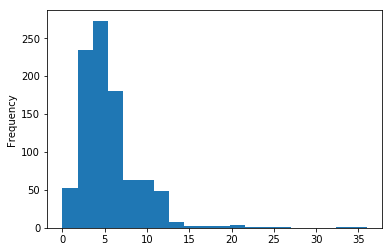

In [49]:
members.PAST_COM.plot.hist(bins=20)

as we can see, except for some outlier (35 years working experience) most of worker has around 5 working experiences in total, this is actually an idea age to start-up their company.

In [50]:
#duration1=pd.read_csv('experience1.csv')
#duration1=duration1[['PUID','MUID','duration']]

In [51]:
#duration2=pd.read_csv('experience2.csv').dropna(axis=[0,1],how='all')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [52]:
#duration2['終止年月']=duration2['終止年月'].replace(['Present','present'],'2019/1')

In [59]:
#duration=members.duration.value_counts().head(10)
#duration.plot('bar')
#怎么画去除outlier的histogram啊啊啊啊啊啊啊啊啊啊。 好崩溃
#seaborn #


In [273]:
#companmembers.groupby('PUID').duration.mean()
company=company.merge(members.groupby('PUID').duration.mean(),on='PUID')
company.head()

,PUID,公司名稱,duration
0,1.0,FunFair,23.500000
1,2.0,EOS,12.500000
2,3.0,Storj,20.666667
3,4.0,Crypto.com,15.416667
4,5.0,Polybius,8.375000


in company table, the duration is the average working experience one company member have

In [274]:
while company.duration.max()>60:
    company.loc[company.duration.idxmax(),'duration']=0


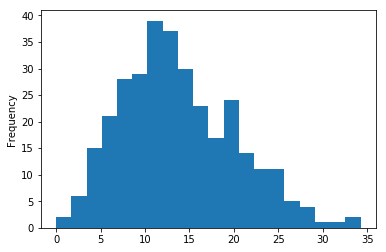

In [275]:
company.duration.plot.hist(bins=20)

we can see, most of company has around 10 years average working experience. 
If we can compare with the start year of company, we could more or less estimate the team start-up age

#### Entrepreneurship 
- weighted tier = mean of (tier*(time/total working time)), if tier higher, we define he/she as entreprenuer or leader backgroup, it could define what kind of talent in this industry will be needed.

In [72]:
experience['duration']=experience['End_time']-experience['Start_time']

In [73]:
#experience=experience.duration.fillna(0)
experience['duration']=experience['duration'].fillna(0)
experience['duration']=experience['duration'].astype(int)

In [74]:
while experience['duration'].max()>50:
    experience['duration'][experience['duration'].idxmax()]=0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
experience=experience.merge(members[['PUID','MUID','duration']],on=['PUID','MUID'],how='left')
experience['TIERS']=experience['TIERS'].fillna(0).astype(int)
experience['duration_y']=experience['duration_y'].fillna(0).astype(int)
experience['duration_x']=experience['duration_x'].fillna(0).astype(int)
experience['weighted_tier']=(1/experience.TIERS)*experience.duration_x/experience.duration_y
leadership=experience.groupby(['PUID','MUID']).weighted_tier.sum()
leadership

PUID   MUID
1.0    1.0     0.959459
       2.0     0.604938
       3.0     0.500000
       4.0     0.454545
2.0    1.0     0.888889
       2.0     0.701754
       3.0     0.833333
       4.0     1.000000
       5.0     0.468750
       6.0     0.448718
3.0    1.0     0.694444
       3.0     0.413043
       4.0     0.285714
       5.0     0.666667
4.0    1.0     1.000000
       2.0     0.722222
       3.0     0.666667
       4.0     0.416667
       5.0     0.378205
       6.0     0.678571
       7.0     0.666667
       8.0     0.568627
5.0    1.0     1.666667
       2.0     2.500000
       3.0     0.136364
       4.0     1.000000
       5.0     0.333333
       6.0     0.320513
6.0    1.0     2.119048
       2.0     0.366667
                 ...   
331.0  3.0     0.493590
       4.0     0.510101
       5.0     0.333333
332.0  1.0     0.692308
333.0  1.0     0.574074
334.0  1.0     1.307692
       2.0     0.518519
       3.0     0.285714
       4.0     0.296296
335.0  1.0     0.777778
336.

In [76]:
while leadership.max()>5:
    leadership[leadership.idxmax()[0],leadership.idxmax()[1]]=0
while leadership.min()<-1:
    leadership[leadership.idxmin()[0],leadership.idxmin()[1]]=0

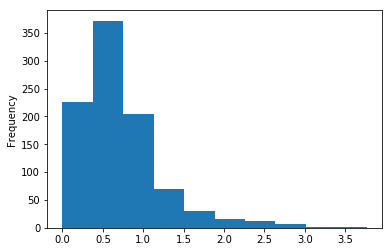

In [77]:
leadership.plot.hist()

In [ ]:
#if we define a entrepernure spends 60% time being CEO
#p1>60%, #p3+p2<40%
#1 * p1 + 1/2 *p2 +1/3 * (0.4-p2) 

In [241]:
members=members.merge(leadership,on=['PUID','MUID'])

In [242]:
members.head()

,PUID,MUID,成員名稱,性別,在此公司的職稱,LinkedIn 連結,連結人數,Unnamed: 7,PAST_COM,Start_time,End_time,duration,weighted_tier
0,1.0,1.0,JEZ SAN OBE,M,Founder,https://www.linkedin.com/in/jezsan/?originalSu...,500.0,NaN,5.0,1982.0,2019.0,37.0,0.959459
1,1.0,2.0,JEREMY LONGLEY,M,Founder,https://www.linkedin.com/in/jeremy-longley-168...,500.0,NaN,5.0,1991.0,2018.0,27.0,0.604938
2,1.0,3.0,OLIVER HOPTON,M,Founder,https://www.linkedin.com/in/oliver-hopton-0387...,500.0,NaN,2.0,2009.0,2017.0,8.0,0.500000
3,1.0,4.0,STEFAN KOVACH,M,CCO,https://www.linkedin.com/in/stefankovach/,500.0,NaN,7.0,1995.0,2017.0,22.0,0.454545
4,2.0,1.0,Brendan Blumer,M,CEO,https://www.linkedin.com/in/brendanblumer/,500.0,NaN,4.0,2001.0,2019.0,18.0,0.888889


In [276]:
#leadership.groupby(['PUID']).mean()
company.join(leadership.groupby(['PUID']).mean(),on='PUID')

,PUID,公司名稱,duration,weighted_tier
0,1.0,FunFair,23.500000,0.629736
1,2.0,EOS,12.500000,0.723574
2,3.0,Storj,20.666667,0.514967
3,4.0,Crypto.com,15.416667,0.637203
4,5.0,Polybius,8.375000,0.992813
5,6.0,Civic,11.000000,1.242857
6,7.0,SkinCoin,7.000000,0.333333
7,8.0,Binance Coin,12.666667,0.583807
8,9.0,NEVERDIE,3.000000,1.000000
9,10.0,Blocktix,15.000000,0.815988


In [278]:
company=company.join(leadership.groupby(['PUID']).mean(),on='PUID')

#### experience data keep the experience of each members

In [ ]:
##industry  无解呜呜呜

### import member and education data

In [218]:
education=pd.concat([education_info1,education_info2],sort=False,ignore_index=True)

In [221]:
#major
education=pd.read_csv('education.csv').dropna(axis=[0,1],how='all')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  


In [222]:
education.head()
education.columns=['PUID','MUID','UNI','DEGREE_NAME','DEGREE_CH','ORIN','DEGREE']

In [223]:
degree_tb=pd.DataFrame({'DEGREE':['Master','Bachlor','Doctor'],'Rank':[2,1,3]})
education=education.merge(degree_tb,on='DEGREE',how='left',sort=False)


In [224]:
idx=education.groupby(by=['PUID','MUID'])['Rank'].idxmax()

In [225]:
education.loc[idx,:]

,PUID,MUID,UNI,DEGREE_NAME,DEGREE_CH,ORIN,DEGREE,Rank
0.0,1.0,2.0,"Selwyn College, Cambridge","MA, Computer Science, 1st Class Honours",碩士,NaN,Master,2.0
1.0,1.0,4.0,The University of Manchester,"Bachelor of Science, Geography BSc Hon.",學士,NaN,Bachlor,1.0
2.0,2.0,2.0,Virginia Tech,"Bachelor of Engineering (BE) in Computer,Compu...",學士,NaN,Bachlor,1.0
3.0,2.0,3.0,University of Iowa - Henry B. Tippie College o...,Master of Business Administration (M.B.A.),碩士,NaN,Master,2.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,3.0,1.0,Harvard University-Kennedy School of Government,"MPA,Development Economics and International De...",碩士,NaN,Master,2.0
10.0,3.0,2.0,Morehouse College,"Bachelor's degree, Computer Science",學士,NaN,Bachlor,1.0
11.0,3.0,3.0,Wake Forest University,"BA, Economics and Russian Language",學士,NaN,Bachlor,1.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
members=members.merge(education.loc[idx,['PUID','MUID','DEGREE','Rank']],on=['PUID','MUID'],how='left')

In [245]:
members.head()

,PUID,MUID,成員名稱,性別,在此公司的職稱,LinkedIn 連結,連結人數,Unnamed: 7,PAST_COM,Start_time,End_time,duration,weighted_tier,DEGREE,Rank
0,1.0,1.0,JEZ SAN OBE,M,Founder,https://www.linkedin.com/in/jezsan/?originalSu...,500.0,NaN,5.0,1982.0,2019.0,37.0,0.959459,NaN,NaN
1,1.0,2.0,JEREMY LONGLEY,M,Founder,https://www.linkedin.com/in/jeremy-longley-168...,500.0,NaN,5.0,1991.0,2018.0,27.0,0.604938,Master,2.0
2,1.0,3.0,OLIVER HOPTON,M,Founder,https://www.linkedin.com/in/oliver-hopton-0387...,500.0,NaN,2.0,2009.0,2017.0,8.0,0.500000,NaN,NaN
3,1.0,4.0,STEFAN KOVACH,M,CCO,https://www.linkedin.com/in/stefankovach/,500.0,NaN,7.0,1995.0,2017.0,22.0,0.454545,Bachlor,1.0
4,2.0,1.0,Brendan Blumer,M,CEO,https://www.linkedin.com/in/brendanblumer/,500.0,NaN,4.0,2001.0,2019.0,18.0,0.888889,NaN,NaN


In [246]:
members.DEGREE.value_counts()

Bachlor    318
Master     287
Doctor      79
Name: DEGREE, dtype: int64

In [247]:
degree_=dict()
word=dict()
for idx in education.index:
    name=education.DEGREE_NAME[idx]
    print(idx,name)
    if name is not np.nan:
        ls=name.upper().split(',')
        #print(ls)
        for item in ls:
            if item in word.keys():
                word[item]+=1
            else:
                word[item]=1
        degree_[idx]=ls
    else: degree_[idx]=''

0 MA, Computer Science, 1st Class Honours
1 Bachelor of Science, Geography BSc Hon.
2 Bachelor of Engineering (BE) in Computer,Computer Science
3 Master of Business Administration (M.B.A.)
4 Bachelor of Business Administration (B.B.A.),Finance
5 International Business
6 nan
7 MPA,Development Economics and International Development
8 MBA, International Business
9 BA, Public Policy
10 Bachelor's degree, Computer Science
11 BA, Economics and Russian Language
12 nan
13 BBA,Accounting
14 nan
15 MBA, Finance
16 Bachelor of Science (B.Sc.), Engineering
17 Bachelor of Engineering (BEng),Computer Science, First Honour
18 nan
19 Master of Business Administration (MBA)
20 Bachelor's of Science
21 Master of Science (MSc)
22 MBA, Marketing/Marketing Management, General
23 Bachelor of Engineering (B.Eng.) , Mechatronics, Robotics, and Automation Engineering, Honors (2A)
24 Bachelor of Commerce (B.Com.)
25 BS, Business Administration
26 Business Administration
27 Bachelor's degree, Business Administr

767 EMBA, MBA
768 BSc (Hons) degree, Financial Services Management
769 Master of Finance (MFin), Finance
770 MA, BA (Hons), Mechanical Engineering
771 Bachelor of Science (BS)
772 B.S., Physics
773 Computer Science
774 Business, Management, Marketing, and Related Support Services
775 Marketing/Marketing Management, General
776 Business Administration, Marketing
777 Bachelor’s Degree, Engineering
778 Master of Business Administration (M.B.A.)
779 BA, Economics & Business
780 Bachelor's degree, Archaeology and Near Eastern Studies
781 Bachelor’s Degree, History and Philosophy
782 BSc, Industrial Engineering and Management
783 MBA, Business
784 Masters, Finance
785 BE, Civil
786 B.Tech, Electrical
787 BSc in Economics, Economics, Business
788 Master, Management Information System
789 Executive MBA
790 Master of Laws (LLM)
791 Bachelor, Economics and Business Administration
792 Bachelor, Mathematics
793 Master, Financial and Actuarial Mathematics
794 PhD, Informatics
795 Bachelor of Engine

In [248]:
degree_=dict()
word=dict()
for idx in education.index:
    name=education.DEGREE_NAME[idx]
    print(idx,name)
    if name is not np.nan:
        if ',' in name:
            ls=name.upper().split(',')
            item=ls[1].strip()
            #print(ls)
            if item in word.keys():
                word[item]+=1
            else:word[item]=1
        else:
            item=name.upper().strip()
            if item in word.keys():
                word[item]+=1
            else:
                word[item]=1
        degree_[idx]=ls
    else: degree_[idx]=''

0 MA, Computer Science, 1st Class Honours
1 Bachelor of Science, Geography BSc Hon.
2 Bachelor of Engineering (BE) in Computer,Computer Science
3 Master of Business Administration (M.B.A.)
4 Bachelor of Business Administration (B.B.A.),Finance
5 International Business
6 nan
7 MPA,Development Economics and International Development
8 MBA, International Business
9 BA, Public Policy
10 Bachelor's degree, Computer Science
11 BA, Economics and Russian Language
12 nan
13 BBA,Accounting
14 nan
15 MBA, Finance
16 Bachelor of Science (B.Sc.), Engineering
17 Bachelor of Engineering (BEng),Computer Science, First Honour
18 nan
19 Master of Business Administration (MBA)
20 Bachelor's of Science
21 Master of Science (MSc)
22 MBA, Marketing/Marketing Management, General
23 Bachelor of Engineering (B.Eng.) , Mechatronics, Robotics, and Automation Engineering, Honors (2A)
24 Bachelor of Commerce (B.Com.)
25 BS, Business Administration
26 Business Administration
27 Bachelor's degree, Business Administr

929 Master, Energy Concentration
930 Master, Master of Energy and Environmental Management and Economics
931 Master's, Financial Engineering
932 Bachelors, Artificial Intelligence and Comparative Religion
933 BS, Computer Science
934 M.E., Computer Science
935 M.S., Computer Science
936 B.Tech., Aerospace Engineering
937 Bachelor of Arts (B.A.), Psychology
938 Master of Business Administration (MBA), Strategic Management
939 Bachelor of Science (BSc), Mathematics and Computer Science
940 Master's degree, Computer Science
941 BA, Land Economy
942 MA, Land Economy
943 Master’s Degree, Aeronautical Engineering, Mathematics, Physics, Calculus, Computing
944 PhD, Computational Fluid Dynamcs, Applied Mathematics
945 Bachelor of Science (B.Sc.), Public Policy
946 BA, Business Management & Finance
947 MS, Finance
948 (BSc) Business Administration
949 MSc, Strategy and International Business
950 Master of Laws - LLM, German and European Law
951 Bachelor's degree, Law
952 Information Technology


In [249]:
len(word.keys())

637

In [250]:
poplist=[]
for key in word.keys():
    if 'COMPUTER SCIENCE' in key and 'COMPUTER SCIENCE'!= key:
        word['COMPUTER SCIENCE']=word['COMPUTER SCIENCE']+word[key]
        poplist.append(key)
    if 'COMPUTER' in key and 'COMPUTER SCIENCE'!= key:
        word['COMPUTER SCIENCE']=word['COMPUTER SCIENCE']+word[key]
        poplist.append(key)
    if 'BUSINESS' in key and 'BUSINESS ADMINISTRATION'!=key:
        word['BUSINESS ADMINISTRATION']=word['BUSINESS ADMINISTRATION']+word[key]
        poplist.append(key)
    if key in ['MBA','MANAGEMENT'] and 'BUSINESS ADMINISTRATION'!=key:
        word['BUSINESS ADMINISTRATION']=word['BUSINESS ADMINISTRATION']+word[key]
        poplist.append(key)
    if 'DEGREE' in key:
        poplist.append(key)
    if 'FINANCE' in key and 'FINANCE'!=key:
        word['FINANCE']=word['FINANCE']+word[key]
        poplist.append(key)
    if 'ELECTRICAL' in key and 'ELECTRICAL'!=key:
        word['ELECTRICAL AND ELECTRONICS ENGINEERING']=word['ELECTRICAL AND ELECTRONICS ENGINEERING']+word[key]
        poplist.append(key)
    if 'MATHEMATICS' in key and 'MATHEMATICS'!=key:
        word['MATHEMATICS']=word['MATHEMATICS']+word[key]
        poplist.append(key)
    if  key in ['INGENIERÍA INFORMÁTICA','INFORMATION MANAGEMENT','INFORMATICS','INFORMATIK']:
        word['INFORMATION TECHNOLOGY']=word['INFORMATION TECHNOLOGY']+word[key]
        poplist.append(key)
    if  key in ['MARKETING/MARKETING MANAGEMENT']:
        word['MARKETING']=word['MARKETING']+word[key]
        poplist.append(key)

In [251]:
for key in poplist:
    word.pop(key,None)

In [252]:
from operator import itemgetter
edu_depart=np.array(sorted(word.items(), key=itemgetter(1),reverse=True)[0:25])

In [253]:
edu_depart

array([['COMPUTER SCIENCE', '270'],
       ['BUSINESS ADMINISTRATION', '134'],
       ['FINANCE', '99'],
       ['MATHEMATICS', '40'],
       ['INFORMATION TECHNOLOGY', '39'],
       ['ECONOMICS', '39'],
       ['PHYSICS', '26'],
       ['LAW', '15'],
       ['MARKETING', '14'],
       ['ENGINEERING', '12'],
       ['MECHANICAL ENGINEERING', '9'],
       ['SOFTWARE ENGINEERING', '9'],
       ['ACCOUNTING', '7'],
       ['POLITICAL SCIENCE', '6'],
       ['PSYCHOLOGY', '6'],
       ['PHILOSOPHY', '4'],
       ['GENERAL', '4'],
       ['ELECTRICAL', '4'],
       ['INDUSTRIAL ENGINEERING AND MANAGEMENT', '4'],
       ['MECHATRONICS', '3'],
       ['HISTORY', '3'],
       ['COMMERCE', '3'],
       ['JOURNALISM', '3'],
       ['STRATEGIC MANAGEMENT', '3'],
       ['PROJECT MANAGEMENT', '3']], dtype='<U37')

In [254]:
copy_edu=education.fillna(0)

In [256]:
for idx in copy_edu.index:
    for i in range(1,26):
        if copy_edu.loc[idx,'DEGREE_NAME'] != 0:
            if edu_depart[i-1][0] in copy_edu.loc[idx,'DEGREE_NAME'].upper():
                copy_edu.loc[idx,'DEGREE_NAME_SHORT']=edu_depart[i-1][0]
                copy_edu.loc[idx,'DEGREE_NAME_CODE']=str(i)
            #else:
            #    copy_edu.loc[idx,'DEGREE_NAME_SHORT']='others'
            #    copy_edu.loc[idx,'DEGREE_NAME_CODE']='0'

In [257]:
copy_edu.head(10)

,PUID,MUID,UNI,DEGREE_NAME,DEGREE_CH,ORIN,DEGREE,Rank,DEGREE_NAME_SHORT,DEGREE_NAME_CODE
0,1.0,2.0,"Selwyn College, Cambridge","MA, Computer Science, 1st Class Honours",碩士,0,Master,2.0,COMPUTER SCIENCE,1
1,1.0,4.0,The University of Manchester,"Bachelor of Science, Geography BSc Hon.",學士,0,Bachlor,1.0,others,0
2,2.0,2.0,Virginia Tech,"Bachelor of Engineering (BE) in Computer,Compu...",學士,0,Bachlor,1.0,ENGINEERING,10
3,2.0,3.0,University of Iowa - Henry B. Tippie College o...,Master of Business Administration (M.B.A.),碩士,0,Master,2.0,BUSINESS ADMINISTRATION,2
4,2.0,3.0,University of Iowa - Henry B. Tippie College o...,"Bachelor of Business Administration (B.B.A.),F...",學士,0,Bachlor,1.0,FINANCE,3
5,2.0,3.0,American College of Thessaloniki,International Business,學士,0,Bachlor,1.0,others,0
6,2.0,6.0,Eastbourne College,0,0,0,0,0.0,NaN,NaN
7,3.0,1.0,Harvard University-Kennedy School of Government,"MPA,Development Economics and International De...",碩士,0,Master,2.0,ECONOMICS,6
8,3.0,1.0,Harvard Business School,"MBA, International Business",碩士,0,Master,2.0,others,0
9,3.0,1.0,Princeton University,"BA, Public Policy",學士,0,Bachlor,1.0,others,0


In [258]:
copy_edu.DEGREE_NAME_SHORT.value_counts()
#copy_edu.DEGREE_NAME_SHORT.isna().sum()

others                                   379
COMPUTER SCIENCE                         144
ENGINEERING                               94
ECONOMICS                                 77
FINANCE                                   66
ELECTRICAL                                59
BUSINESS ADMINISTRATION                   56
PHILOSOPHY                                44
MATHEMATICS                               38
LAW                                       38
PHYSICS                                   34
MARKETING                                 33
GENERAL                                   32
ACCOUNTING                                29
INFORMATION TECHNOLOGY                    29
SOFTWARE ENGINEERING                      21
COMMERCE                                  17
MECHANICAL ENGINEERING                    15
PSYCHOLOGY                                14
POLITICAL SCIENCE                          8
JOURNALISM                                 7
HISTORY                                    7
STRATEGIC 

In [259]:
education_final=copy_edu[['PUID','MUID','DEGREE','Rank','DEGREE_NAME_SHORT','DEGREE_NAME_CODE']]

In [260]:
education_final

,PUID,MUID,DEGREE,Rank,DEGREE_NAME_SHORT,DEGREE_NAME_CODE
0,1.0,2.0,Master,2.0,COMPUTER SCIENCE,1
1,1.0,4.0,Bachlor,1.0,others,0
2,2.0,2.0,Bachlor,1.0,ENGINEERING,10
3,2.0,3.0,Master,2.0,BUSINESS ADMINISTRATION,2
4,2.0,3.0,Bachlor,1.0,FINANCE,3
5,2.0,3.0,Bachlor,1.0,others,0
6,2.0,6.0,0,0.0,NaN,NaN
7,3.0,1.0,Master,2.0,ECONOMICS,6
8,3.0,1.0,Master,2.0,others,0
9,3.0,1.0,Bachlor,1.0,others,0


In [261]:
members.merge(education_final,on=['PUID','MUID'],how='left')

,PUID,MUID,成員名稱,性別,在此公司的職稱,LinkedIn 連結,連結人數,Unnamed: 7,PAST_COM,Start_time,End_time,duration,weighted_tier,DEGREE_x,Rank_x,DEGREE_y,Rank_y,DEGREE_NAME_SHORT,DEGREE_NAME_CODE
0,1.0,1.0,JEZ SAN OBE,M,Founder,https://www.linkedin.com/in/jezsan/?originalSu...,500.0,NaN,5.0,1982.0,2019.0,37.0,0.959459,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,JEREMY LONGLEY,M,Founder,https://www.linkedin.com/in/jeremy-longley-168...,500.0,NaN,5.0,1991.0,2018.0,27.0,0.604938,Master,2.0,Master,2.0,COMPUTER SCIENCE,1
2,1.0,3.0,OLIVER HOPTON,M,Founder,https://www.linkedin.com/in/oliver-hopton-0387...,500.0,NaN,2.0,2009.0,2017.0,8.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,STEFAN KOVACH,M,CCO,https://www.linkedin.com/in/stefankovach/,500.0,NaN,7.0,1995.0,2017.0,22.0,0.454545,Bachlor,1.0,Bachlor,1.0,others,0
4,2.0,1.0,Brendan Blumer,M,CEO,https://www.linkedin.com/in/brendanblumer/,500.0,NaN,4.0,2001.0,2019.0,18.0,0.888889,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,2.0,Daniel Larimer,M,CTO,https://www.linkedin.com/in/daniel-larimer-0a3...,223.0,NaN,10.0,2000.0,2019.0,19.0,0.701754,Bachlor,1.0,Bachlor,1.0,ENGINEERING,10
6,2.0,3.0,Andrew Bliss,M,CFO,https://www.linkedin.com/in/andrewcbliss/?orig...,500.0,NaN,2.0,2014.0,2018.0,4.0,0.833333,Master,2.0,Master,2.0,BUSINESS ADMINISTRATION,2
7,2.0,3.0,Andrew Bliss,M,CFO,https://www.linkedin.com/in/andrewcbliss/?orig...,500.0,NaN,2.0,2014.0,2018.0,4.0,0.833333,Master,2.0,Bachlor,1.0,FINANCE,3
8,2.0,3.0,Andrew Bliss,M,CFO,https://www.linkedin.com/in/andrewcbliss/?orig...,500.0,NaN,2.0,2014.0,2018.0,4.0,0.833333,Master,2.0,Bachlor,1.0,others,0
9,2.0,4.0,Michael Alexander,M,CEO,https://www.linkedin.com/in/michael-alexander-...,500.0,NaN,1.0,2010.0,2019.0,9.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
members=members.merge(education_final,on=['PUID','MUID'],how='left')

In [263]:
members.to_csv('members_data.csv')

In [277]:
company

,PUID,公司名稱,duration
0,1.0,FunFair,23.500000
1,2.0,EOS,12.500000
2,3.0,Storj,20.666667
3,4.0,Crypto.com,15.416667
4,5.0,Polybius,8.375000
5,6.0,Civic,11.000000
6,7.0,SkinCoin,7.000000
7,8.0,Binance Coin,12.666667
8,9.0,NEVERDIE,3.000000
9,10.0,Blocktix,15.000000


In [280]:
company.to_csv('company_data.csv')